In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
numIter=10000

w1=0.1
w2=0.2
w3=0.3
w4=0.4
w5=0.5
w6=0.6
w7=0.7
w8=0.8
w9=0.9
w10=0.1
b1=0.5
b2=0.5
wList=[w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]
bList=[b1,b2]

In [39]:
x1=1
x2=4
x3=5
xList=[x1,x2,x3]

In [35]:
t1=0.01
t2=0.99

In [24]:
sh1=w1*x1+w3*x2+w5*x3+b1
sh2=w2*x1+w4*x2+w6*x3+b1

In [13]:
def sigmoid(x):
    return np.divide(1,(1+np.exp(-x)))

In [15]:
sigmoid(0)

0.5

In [25]:
h1=sigmoid(sh1)
h2=sigmoid(sh2)

In [31]:
so1=w7*h1+w9*h2+b2
so2=w8*h1+w10*h2+b2

In [32]:
o1=sigmoid(so1)
o2=sigmoid(so2)

In [34]:
o1

0.88955061396979496

In [44]:
def error(o1,o2):
    t1=0.01
    t2=0.99
    return ((1/2)*(np.power((o1-t1),2)+np.power((o2-t2),2)))

In [38]:
E=error(o1,o2)

0.40477879557782137

In [41]:
def forwardProp(xList,wList,bList):
    sh1=wList[0]*xList[0] + wList[2]*xList[1] + wList[4]*xList[2] +bList[0]
    sh2=wList[1]*xList[0] + wList[3]*xList[1] + wList[5]*xList[2] +bList[0]
    h1=sigmoid(sh1)
    h2=sigmoid(sh2)
    so1=wList[6]*h1+wList[8]*h2+bList[1]
    so2=wList[7]*h1+wList[9]*h2+bList[1]
    o1=sigmoid(so1)
    o2=sigmoid(so2)
    return h1,h2,o1,o2

In [61]:
errList=[]
t1=0.01
t2=0.99
for i in range(numIter):
    h1,h2,o1,o2 = forwardProp(xList,wList,bList)
    sse = error(o1,o2)
    errList.append(sse)
    print("Progress--\n",str(i+1)," completed out of ",numIter)
    print("o1->",o1)
    print("t1->",t1)
    print("o2->",o2)
    print("t2->",t2)
    print("Error->",sse,"\n")
    
    
    de_do1 = (o1-t1)
    do1_dso1= o1*(1-o1)
    dso1_dw7 = h1
    de_dw7 = de_do1 *do1_dso1 * dso1_dw7
    
    
    de_do2 = (o2-t2)
    do2_dso2= o2*(1-o2)
    dso2_dw8 = h1
    de_dw8 = de_do2 *do2_dso2 * dso2_dw8
    

    dso1_dw9 = h2
    de_dw9 = de_do1 *do1_dso1 * dso1_dw9

    dso2_dw10 = h2
    de_dw10 = de_do2 *do2_dso2 * dso2_dw10
    
    dso1_db2 = 1
    dso2_db2 = 1
    de_db2 = de_do1*do1_dso1 *dso1_db2 + de_do2*do2_dso2 *dso2_db2
    
    #---------------------------------
    
    dso1_dh1=w7
    dso2_dh1=w8
    de_dh1 = de_do1*do1_dso1*dso1_dh1 + de_do2*do2_dso2*dso2_dh1
    
    dh1_dsh1 = h1*(1-h1)
    dsh1_dw1 = x1
    de_dw1 = de_dh1 * dh1_dsh1 * dsh1_dw1
    
    dsh1_dw3 = x2
    de_dw3 = de_dh1 * dh1_dsh1 * dsh1_dw3
    
    dsh1_dw5 = x3
    de_dw5 = de_dh1 * dh1_dsh1 * dsh1_dw5
    
    
    
    dso1_dh2=w9
    dso2_dh2=w10
    de_dh2 = de_do1*do1_dso1*dso1_dh2 + de_do2*do2_dso2*dso2_dh2
    
    dh2_dsh2 = h2*(1-h2)
    dsh2_dw2 = x1
    de_dw2 = de_dh2 * dh2_dsh2 * dsh2_dw2
    
    dsh2_dw4 = x2
    de_dw4 = de_dh2 * dh2_dsh2 * dsh2_dw4
    
    dsh2_dw6 = x3
    de_dw6 = de_dh2 * dh2_dsh2 * dsh2_dw6
    
    dsh1_db1 = 1
    dsh2_db1 = 1
    
    term1 = de_do1 * do1_dso1 * dso1_dh1* dh1_dsh1 * dsh1_db1
    term2 = de_do2 * do2_dso2 * dso2_dh2* dh2_dsh2 * dsh2_db1
    
    de_db1 = term1 + term2
    
    alpha=0.01
    w1 = w1 - alpha* de_dw1
    w2 = w2 - alpha* de_dw2
    w3 = w3 - alpha* de_dw3
    w4 = w4 - alpha* de_dw4
    w5 = w5 - alpha* de_dw5
    w6 = w6 - alpha* de_dw6
    w7 = w7 - alpha* de_dw7
    w8 = w8 - alpha* de_dw8
    w9 = w9 - alpha* de_dw9
    w10 = w10-alpha* de_dw10
    b1= b1- alpha*de_db1
    b2= b2- alpha*de_db2
    wList=[w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]
    print(wList)
    bList=[b1,b2]

Progress--
 1  completed out of  10000
o1-> 1.65005607289e-09
t1-> 0.01
o2-> 0.954637571143
t2-> 0.99
Error-> 0.000675250670825 

[0.16759598887680724, 0.3692942930218478, 2.2944098076654726, 1.0771771720873906, 2.9930122595818114, 1.4464714651092567, -7.8276334766512434, 4.2078053070482158, -7.7004114135174655, 3.5333143130312408]
Progress--
 2  completed out of  10000
o1-> 1.65008134136e-09
t1-> 0.01
o2-> 0.954639560548
t2-> 0.99
Error-> 0.00067518032262 

[0.16759598887680793, 0.3692942931651787, 2.2944098076654753, 1.0771771726607142, 2.9930122595818149, 1.4464714658259112, -7.8276334766510782, 4.2078206191333374, -7.7004114135173003, 3.5333296250757971]
Progress--
 3  completed out of  10000
o1-> 1.65010660774e-09
t1-> 0.01
o2-> 0.954641549675
t2-> 0.99
Error-> 0.000675109988206 

[0.16759598887680863, 0.36929429330849617, 2.294409807665478, 1.0771771732339841, 2.9930122595818185, 1.4464714665424987, -7.827633476650913, 4.2078359297175911, -7.7004114135171351, 3.533344935619489]
P


[0.16759598887688357, 0.36929430870826235, 2.2944098076657657, 1.0771772348330488, 2.9930122595822022, 1.4464715435413322, -7.8276334766330713, 4.20948069846549, -7.7004114134992934, 3.5349897000099886]
Progress--
 112  completed out of  10000
o1-> 1.65284819067e-09
t1-> 0.01
o2-> 0.954856711268
t2-> 0.99
Error-> 0.000667525354926 

[0.16759598887688426, 0.36929430885013054, 2.2944098076657684, 1.0771772354005216, 2.9930122595822057, 1.446471544250673, -7.8276334766329061, 4.2094958471109063, -7.7004114134991282, 3.5350048486152725]
Progress--
 113  completed out of  10000
o1-> 1.65287322927e-09
t1-> 0.01
o2-> 0.954858670188
t2-> 0.99
Error-> 0.000667456513951 

[0.16759598887688495, 0.36929430899198551, 2.2944098076657711, 1.0771772359679415, 2.9930122595822093, 1.4464715449599479, -7.8276334766327409, 4.209510994285683, -7.700411413498963, 3.5350199957499209]
Progress--
 114  completed out of  10000
o1-> 1.65289826582e-09
t1-> 0.01
o2-> 0.954860628837
t2-> 0.99
Error-> 0.00066738768

Error-> 0.000658888248617 

[0.16759598887697238, 0.36929432676117457, 2.2944098076661068, 1.0771773070446977, 2.9930122595826569, 1.4464716338058947, -7.8276334766119255, 4.211407863343883, -7.7004114134781476, 3.5369168597828438]
Progress--
 240  completed out of  10000
o1-> 1.656036573e-09
t1-> 0.01
o2-> 0.955105269968
t2-> 0.99
Error-> 0.000658821075431 

[0.16759598887697308, 0.36929432690137648, 2.2944098076661095, 1.0771773076055053, 2.9930122595826605, 1.4464716345069042, -7.8276334766117603, 4.2114228259226065, -7.7004114134779824, 3.5369318223219275]
Progress--
 241  completed out of  10000
o1-> 1.65606135177e-09
t1-> 0.01
o2-> 0.955107194676
t2-> 0.99
Error-> 0.000658753915145 

[0.16759598887697377, 0.36929432704156551, 2.2944098076661121, 1.0771773081662614, 2.993012259582664, 1.4464716352078495, -7.8276334766115951, 4.2114377870647459, -7.7004114134778172, 3.5369467834244315]
Progress--
 242  completed out of  10000
o1-> 1.65608612852e-09
t1-> 0.01
o2-> 0.955109119119
t2-

 398  completed out of  10000
o1-> 1.65992692e-09
t1-> 0.01
o2-> 0.955406144204
t2-> 0.99
Error-> 0.000648367412802 

[0.16759598887708166, 0.36929434889311635, 2.2944098076665305, 1.0771773955724648, 2.9930122595832218, 1.4464717444656039, -7.8276334765855324, 4.2137690385223774, -7.7004114134517545, 3.5392780287060095]
Progress--
 399  completed out of  10000
o1-> 1.65995138551e-09
t1-> 0.01
o2-> 0.955408028013
t2-> 0.99
Error-> 0.000648302246365 

[0.16759598887708232, 0.36929434903130037, 2.2944098076665331, 1.0771773961252009, 2.9930122595832254, 1.4464717451565239, -7.8276334765853663, 4.213783775922856, -7.7004114134515884, 3.5392927660674447]
Progress--
 400  completed out of  10000
o1-> 1.65997584906e-09
t1-> 0.01
o2-> 0.955409911568
t2-> 0.99
Error-> 0.000648237092274 

[0.16759598887708299, 0.36929434916947185, 2.2944098076665358, 1.0771773966778868, 2.9930122595832289, 1.4464717458473813, -7.8276334765852003, 4.2137985119274548, -7.7004114134514223, 3.539307502033004]
Progr

t2-> 0.99
Error-> 0.000636518274462 

[0.16759598887720489, 0.36929437424641537, 2.2944098076670234, 1.0771774969856609, 2.9930122595838791, 1.4464718712321007, -7.8276334765548059, 4.2164719567898574, -7.700411413421028, 3.541980939812805]
Progress--
 584  completed out of  10000
o1-> 1.66444416762e-09
t1-> 0.01
o2-> 0.955752216069
t2-> 0.99
Error-> 0.000636455335456 

[0.16759598887720556, 0.36929437438232093, 2.2944098076670261, 1.0771774975292832, 2.9930122595838826, 1.4464718719116287, -7.8276334765546398, 4.2164864401494437, -7.7004114134208619, 3.5419954231340216]
Progress--
 585  completed out of  10000
o1-> 1.66446827453e-09
t1-> 0.01
o2-> 0.955754053529
t2-> 0.99
Error-> 0.000636392408189 

[0.16759598887720623, 0.3692943745182144, 2.2944098076670287, 1.077177498072857, 2.9930122595838862, 1.4464718725910961, -7.8276334765544737, 4.2165009221583993, -7.7004114134206958, 3.5420099051046106]
Progress--
 586  completed out of  10000
o1-> 1.66449237955e-09
t1-> 0.01
o2-> 0.955755

 747  completed out of  10000
o1-> 1.66834873709e-09
t1-> 0.01
o2-> 0.956048536403
t2-> 0.99
Error-> 0.0006263509235 

[0.16759598887731414, 0.36929439637443834, 2.2944098076674604, 1.0771775854977528, 2.9930122595843911, 1.446471981872218, -7.8276334765274544, 4.218829345690847, -7.7004114133936774, 3.5443383224685086]
Progress--
 748  completed out of  10000
o1-> 1.66837253845e-09
t1-> 0.01
o2-> 0.956050334765
t2-> 0.99
Error-> 0.0006262898681 

[0.16759598887731481, 0.36929439650838392, 2.2944098076674631, 1.0771775860335351, 2.9930122595843942, 1.4464719825419459, -7.8276334765272875, 4.2188436106924732, -7.7004114133935104, 3.5443525874323436]
Progress--
 749  completed out of  10000
o1-> 1.66839633796e-09
t1-> 0.01
o2-> 0.956052132891
t2-> 0.99
Error-> 0.000626228823934 

[0.16759598887731547, 0.36929439664231767, 2.2944098076674657, 1.0771775865692701, 2.9930122595843973, 1.4464719832116149, -7.8276334765271205, 4.2188578743817908, -7.7004114133933435, 3.5443668510838733]
Progre

Error-> 0.000616960265306 

[0.16759598887741586, 0.36929441712870564, 2.2944098076678761, 1.077177668514822, 2.993012259584876, 1.4464720856435553, -7.827633476501406, 4.2210389606911578, -7.7004114133676289, 3.5465479316150286]
Progress--
 904  completed out of  10000
o1-> 1.67206307536e-09
t1-> 0.01
o2-> 0.956328025197
t2-> 0.99
Error-> 0.000616900926846 

[0.1675959888774165, 0.36929441726083673, 2.2944098076678787, 1.0771776690433463, 2.9930122595848792, 1.4464720863042109, -7.827633476501239, 4.2210530237016712, -7.7004114133674619, 3.546561994588286]
Progress--
 905  completed out of  10000
o1-> 1.67208658977e-09
t1-> 0.01
o2-> 0.956329787174
t2-> 0.99
Error-> 0.000616841599165 

[0.16759598887741714, 0.36929441739295638, 2.2944098076678814, 1.0771776695718249, 2.9930122595848823, 1.4464720869648091, -7.827633476501072, 4.2210670854348553, -7.700411413367295, 3.5465760562842172]
Progress--
 906  completed out of  10000
o1-> 1.67211010237e-09
t1-> 0.01
o2-> 0.956331548922
t2-> 0.


[0.16759598887751992, 0.36929443851587812, 2.2944098076683104, 1.0771777540635119, 2.9930122595853828, 1.4464721925794193, -7.8276334764741256, 4.2233145209709466, -7.7004114133403494, 3.5488234858663308]
Progress--
 1067  completed out of  10000
o1-> 1.67587228819e-09
t1-> 0.01
o2-> 0.956612252671
t2-> 0.99
Error-> 0.000607370819094 

[0.16759598887752056, 0.36929443864616335, 2.294409807668313, 1.0771777545846528, 2.9930122595853859, 1.4464721932308453, -7.8276334764739577, 4.2233283786391818, -7.7004114133401815, 3.548837343497854]
Progress--
 1068  completed out of  10000
o1-> 1.67589551203e-09
t1-> 0.01
o2-> 0.956613978133
t2-> 0.99
Error-> 0.000607313211286 

[0.1675959888775212, 0.36929443877643736, 2.2944098076683157, 1.0771777551057489, 2.993012259585389, 1.4464721938822154, -7.8276334764737898, 4.2233422350651839, -7.7004114133400137, 3.5488511998871473]
Progress--
 1069  completed out of  10000
o1-> 1.67591873411e-09
t1-> 0.01
o2-> 0.956615703375
t2-> 0.99
Error-> 0.0006072

 1236  completed out of  10000
o1-> 1.67977234445e-09
t1-> 0.01
o2-> 0.956900766216
t2-> 0.99
Error-> 0.000597779621762 

[0.16759598887762844, 0.36929446050536069, 2.2944098076687633, 1.0771778420214422, 2.9930122595859112, 1.4464723025268313, -7.8276334764455884, 4.2256526477786531, -7.7004114133118122, 3.5511616064797984]
Progress--
 1237  completed out of  10000
o1-> 1.67979527465e-09
t1-> 0.01
o2-> 0.956902455113
t2-> 0.99
Error-> 0.000597723721985 

[0.16759598887762908, 0.36929446063377297, 2.294409807668766, 1.0771778425350913, 2.9930122595859143, 1.4464723031688926, -7.8276334764454205, 4.2256662972546568, -7.7004114133116444, 3.5511752559196412]
Progress--
 1238  completed out of  10000
o1-> 1.67981820313e-09
t1-> 0.01
o2-> 0.956904143797
t2-> 0.99
Error-> 0.000597667832097 

[0.16759598887762972, 0.36929446076217437, 2.2944098076687687, 1.0771778430486969, 2.9930122595859174, 1.4464723038108998, -7.8276334764452526, 4.2256799455235319, -7.7004114133114765, 3.5511889041523585

o1-> 1.68255724602e-09
t1-> 0.01
o2-> 0.957105255571
t2-> 0.99
Error-> 0.000591032088696 

[0.16759598887770549, 0.36929447609199301, 2.2944098076690884, 1.0771779043679715, 2.9930122595862905, 1.4464723804599915, -7.8276334764251088, 4.2273090332790098, -7.7004114132913326, 3.5528179875920123]
Progress--
 1359  completed out of  10000
o1-> 1.68257996889e-09
t1-> 0.01
o2-> 0.957106918856
t2-> 0.99
Error-> 0.000590977376761 

[0.1675959888777061, 0.36929447621909284, 2.2944098076690911, 1.0771779048763708, 2.9930122595862936, 1.4464723810954907, -7.8276334764249409, 4.2273225369626912, -7.7004114132911647, 3.5528314912399193]
Progress--
 1360  completed out of  10000
o1-> 1.68260269007e-09
t1-> 0.01
o2-> 0.957108581933
t2-> 0.99
Error-> 0.000590922674411 

[0.16759598887770671, 0.36929447634618207, 2.2944098076690937, 1.0771779053847277, 2.9930122595862967, 1.4464723817309366, -7.827633476424773, 4.2273360394635402, -7.7004114132909969, 3.5528449937049973]
Progress--
 1361  completed ou

Error-> 0.000582292085052 

[0.16759598887780441, 0.36929449654445812, 2.2944098076695201, 1.0771779861778319, 2.9930122595867941, 1.4464724827223163, -7.8276334763977911, 4.229481339831783, -7.7004114132640158, 3.5549902883898543]
Progress--
 1521  completed out of  10000
o1-> 1.68623902133e-09
t1-> 0.01
o2-> 0.957373663656
t2-> 0.99
Error-> 0.000582238894753 

[0.16759598887780502, 0.3692944966698547, 2.2944098076695227, 1.0771779866794182, 2.9930122595867972, 1.4464724833492992, -7.8276334763976223, 4.2294946544216341, -7.700411413263847, 3.5550036029444319]
Progress--
 1522  completed out of  10000
o1-> 1.68626147306e-09
t1-> 0.01
o2-> 0.957375293702
t2-> 0.99
Error-> 0.000582185713656 

[0.16759598887780564, 0.3692944967952409, 2.2944098076695254, 1.077177987180963, 2.9930122595868003, 1.4464724839762302, -7.8276334763974535, 4.2295079678598126, -7.7004114132636783, 3.55501691634734]
Progress--
 1523  completed out of  10000
o1-> 1.68628392315e-09
t1-> 0.01
o2-> 0.957376923547
t2-

 1693  completed out of  10000
o1-> 1.69007675724e-09
t1-> 0.01
o2-> 0.957651115693
t2-> 0.99
Error-> 0.000573225141057 

[0.16759598887791005, 0.36929451808505781, 2.2944098076699384, 1.0771780723402307, 2.9930122595873319, 1.4464725904253175, -7.8276334763685966, 4.2317677875754942, -7.7004114132348214, 3.5572767300762638]
Progress--
 1694  completed out of  10000
o1-> 1.6900989299e-09
t1-> 0.01
o2-> 0.957652711831
t2-> 0.99
Error-> 0.000573173509033 

[0.16759598887791066, 0.36929451820868336, 2.2944098076699406, 1.0771780728347329, 2.993012259587335, 1.4464725910434453, -7.8276334763684279, 4.2317809056932347, -7.7004114132346526, 3.5572898481592516]
Progress--
 1695  completed out of  10000
o1-> 1.69012110097e-09
t1-> 0.01
o2-> 0.957654307776
t2-> 0.99
Error-> 0.000573121885823 

[0.16759598887791127, 0.36929451833229882, 2.2944098076699428, 1.0771780733291947, 2.9930122595873381, 1.4464725916615226, -7.8276334763682591, 4.2317940226912567, -7.7004114132344839, 3.5573029651225241]

o2-> 0.957913449946
t2-> 0.99
Error-> 0.000564773330236 

[0.16759598887801141, 0.36929453846979748, 2.294409807670307, 1.0771781538791894, 2.9930122595878479, 1.4464726923490157, -7.8276334763405124, 4.2339301946832677, -7.7004114132067372, 3.5594391314553393]
Progress--
 1860  completed out of  10000
o1-> 1.69375756625e-09
t1-> 0.01
o2-> 0.957915014444
t2-> 0.99
Error-> 0.000564723132118 

[0.16759598887801203, 0.36929453859176842, 2.2944098076703092, 1.0771781543670731, 2.993012259587851, 1.4464726929588703, -7.8276334763403428, 4.2339431293728627, -7.7004114132065675, 3.5594520661106679]
Progress--
 1861  completed out of  10000
o1-> 1.69377947463e-09
t1-> 0.01
o2-> 0.957916578755
t2-> 0.99
Error-> 0.000564672942463 

[0.16759598887801264, 0.36929453871372947, 2.2944098076703114, 1.0771781548549173, 2.9930122595878541, 1.4464726935686756, -7.8276334763401731, 4.2339560629721831, -7.7004114132063979, 3.5594649996757242]
Progress--
 1862  completed out of  10000
o1-> 1.69380138143e-0

t1-> 0.01
o2-> 0.958139900743
t2-> 0.99
Error-> 0.000557532945364 

[0.16759598887809701, 0.36929455617417944, 2.2944098076706312, 1.0771782246967172, 2.9930122595883017, 1.4464727808709266, -7.8276334763157447, 4.2358072064111498, -7.7004114131819694, 3.5613161382106071]
Progress--
 2006  completed out of  10000
o1-> 1.69693975473e-09
t1-> 0.01
o2-> 0.958141438254
t2-> 0.99
Error-> 0.00055748396128 

[0.1675959888780976, 0.36929455629472996, 2.2944098076706334, 1.0771782251789193, 2.9930122595883049, 1.4464727814736791, -7.827633476315575, 4.2358199837405435, -7.7004114131817998, 3.5613289155061505]
Progress--
 2007  completed out of  10000
o1-> 1.69696143723e-09
t1-> 0.01
o2-> 0.958142975584
t2-> 0.99
Error-> 0.000557434985364 

[0.16759598887809818, 0.36929455641527081, 2.2944098076706356, 1.0771782256610827, 2.993012259588308, 1.4464727820763834, -7.8276334763154054, 4.2358327600046213, -7.7004114131816301, 3.5613416917363812]
Progress--
 2008  completed out of  10000
o1-> 1.696983

o1-> 1.70032529859e-09
t1-> 0.01
o2-> 0.958380590356
t2-> 0.99
Error-> 0.000549893516122 

[0.16759598887818911, 0.36929457510279512, 2.294409807670982, 1.0771783004111799, 2.9930122595887929, 1.4464728755140039, -7.8276334762889412, 4.2378129187476965, -7.700411413155166, 3.5633218452335873]
Progress--
 2164  completed out of  10000
o1-> 1.70034674341e-09
t1-> 0.01
o2-> 0.958382099513
t2-> 0.99
Error-> 0.000549845798592 

[0.16759598887818969, 0.36929457522184389, 2.2944098076709842, 1.077178300887375, 2.993012259588796, 1.4464728761092478, -7.8276334762887716, 4.237825529816325, -7.7004114131549963, 3.5633344562688065]
Progress--
 2165  completed out of  10000
o1-> 1.70036818674e-09
t1-> 0.01
o2-> 0.958383608494
t2-> 0.99
Error-> 0.000549798088926 

[0.16759598887819027, 0.36929457534088328, 2.2944098076709865, 1.0771783013635325, 2.9930122595887991, 1.4464728767044448, -7.827633476288602, 4.2378381398457083, -7.7004114131548267, 3.5633470662647833]
Progress--
 2166  completed out of


[0.16759598887826954, 0.36929459144337046, 2.2944098076712884, 1.0771783657734813, 2.9930122595892175, 1.4464729572168809, -7.8276334762654303, 4.2395434911138814, -7.700411413131655, 3.5650524130151138]
Progress--
 2302  completed out of  10000
o1-> 1.70329186423e-09
t1-> 0.01
o2-> 0.958588683114
t2-> 0.99
Error-> 0.000543335397231 

[0.16759598887827012, 0.36929459156113675, 2.2944098076712907, 1.0771783662445464, 2.9930122595892201, 1.4464729578057125, -7.8276334762652597, 4.2395559602820718, -7.7004114131314845, 3.5650648821502711]
Progress--
 2303  completed out of  10000
o1-> 1.70331310299e-09
t1-> 0.01
o2-> 0.95859016803
t2-> 0.99
Error-> 0.000543288755169 

[0.16759598887827071, 0.36929459167889389, 2.2944098076712929, 1.077178366715575, 2.9930122595892228, 1.4464729583944982, -7.8276334762650892, 4.2395684284330226, -7.7004114131313139, 3.5650773502681914]
Progress--
 2304  completed out of  10000
o1-> 1.70333434029e-09
t1-> 0.01
o2-> 0.958591652774
t2-> 0.99
Error-> 0.000543

t2-> 0.99
Error-> 0.000536150136107 

[0.16759598887836105, 0.36929460982093271, 2.294409807671637, 1.0771784392837302, 2.9930122595896358, 1.4464730491046938, -7.827633476238657, 4.2414887918372646, -7.7004114131048818, 3.5669977085849749]
Progress--
 2459  completed out of  10000
o1-> 1.70660850411e-09
t1-> 0.01
o2-> 0.958819728132
t2-> 0.99
Error-> 0.000536104659801 

[0.16759598887836163, 0.36929460993727198, 2.2944098076716393, 1.0771784397490873, 2.9930122595896385, 1.44647304968639, -7.8276334762384865, 4.2415011031983267, -7.7004114131047112, 3.5670100199134214]
Progress--
 2460  completed out of  10000
o1-> 1.70662951492e-09
t1-> 0.01
o2-> 0.958821186427
t2-> 0.99
Error-> 0.000536059190831 

[0.16759598887836222, 0.36929461005360226, 2.2944098076716415, 1.0771784402144085, 2.9930122595896411, 1.4464730502680414, -7.827633476238316, 4.2415134135663566, -7.7004114131045407, 3.5670223302488382]
Progress--
 2461  completed out of  10000
o1-> 1.70665052428e-09
t1-> 0.01
o2-> 0.9588

t1-> 0.01
o2-> 0.959062402516
t2-> 0.99
Error-> 0.000528567451947 

[0.16759598887845539, 0.36929462935578733, 2.2944098076720123, 1.0771785174231487, 2.9930122595900861, 1.446473146778968, -7.8276334762098205, 4.2435554333452759, -7.7004114130760462, 3.5690643446180168]
Progress--
 2628  completed out of  10000
o1-> 1.71013909918e-09
t1-> 0.01
o2-> 0.959063833182
t2-> 0.99
Error-> 0.000528523191602 

[0.16759598887845595, 0.36929462947062713, 2.2944098076720145, 1.077178517882508, 2.9930122595900888, 1.4464731473531671, -7.8276334762096491, 4.2435675790072054, -7.7004114130758747, 3.5690764902477699]
Progress--
 2629  completed out of  10000
o1-> 1.71015987008e-09
t1-> 0.01
o2-> 0.959065263686
t2-> 0.99
Error-> 0.000528478938312 

[0.1675959888784565, 0.36929462958545822, 2.2944098076720167, 1.0771785183418323, 2.9930122595900914, 1.4464731479273225, -7.8276334762094777, 4.2435797237012203, -7.7004114130757033, 3.5690886349096109]
Progress--
 2630  completed out of  10000
o1-> 1.71018

o1-> 1.71373228277e-09
t1-> 0.01
o2-> 0.959310330557
t2-> 0.99
Error-> 0.000520927888116 

[0.16759598887855254, 0.36929464932047978, 2.2944098076724009, 1.0771785972819186, 2.9930122595905524, 1.4464732466024324, -7.8276334761798223, 4.2456663144922162, -7.7004114130460479, 3.5711752201727909]
Progress--
 2803  completed out of  10000
o1-> 1.7137528124e-09
t1-> 0.01
o2-> 0.959311733345
t2-> 0.99
Error-> 0.000520884837994 

[0.16759598887855309, 0.36929464943380563, 2.2944098076724031, 1.077178597735222, 2.9930122595905551, 1.4464732471690618, -7.8276334761796509, 4.2456782929609753, -7.7004114130458765, 3.5711871986098167]
Progress--
 2804  completed out of  10000
o1-> 1.71377334066e-09
t1-> 0.01
o2-> 0.959313135977
t2-> 0.99
Error-> 0.000520841794649 

[0.16759598887855365, 0.36929464954712299, 2.2944098076724053, 1.0771785981884914, 2.9930122595905577, 1.4464732477356483, -7.8276334761794795, 4.2456902704868513, -7.7004114130457051, 3.5711991761039616]
Progress--
 2805  completed ou

o1-> 1.71736514169e-09
t1-> 0.01
o2-> 0.959557584118
t2-> 0.99
Error-> 0.000513370325193 

[0.16759598887865135, 0.36929466935907351, 2.2944098076727961, 1.0771786774362935, 2.9930122595910267, 1.4464733467954001, -7.8276334761493098, 4.247783757093651, -7.7004114130155354, 3.5732926571646839]
Progress--
 2981  completed out of  10000
o1-> 1.7173854303e-09
t1-> 0.01
o2-> 0.959558959454
t2-> 0.99
Error-> 0.000513328457589 

[0.1675959888786519, 0.36929466947089834, 2.2944098076727983, 1.0771786778835928, 2.9930122595910293, 1.4464733473545244, -7.8276334761491384, 4.2477955699107524, -7.700411413015364, 3.5733044699504908]
Progress--
 2982  completed out of  10000
o1-> 1.71740571759e-09
t1-> 0.01
o2-> 0.959560334638
t2-> 0.99
Error-> 0.000513286596496 

[0.16759598887865246, 0.36929466958271484, 2.2944098076728006, 1.0771786783308588, 2.993012259591032, 1.4464733479136069, -7.827633476148967, 4.2478073818094613, -7.7004114130151926, 3.5733162818179074]
Progress--
 2983  completed out of

[0.16759598887873128, 0.36929468537671539, 2.2944098076731159, 1.077178741506861, 2.9930122595914104, 1.4464734268836092, -7.8276334761245527, 4.2494754122370102, -7.7004114129907784, 3.5749843078265067]
Progress--
 3125  completed out of  10000
o1-> 1.720293113e-09
t1-> 0.01
o2-> 0.959755437341
t2-> 0.99
Error-> 0.000507366768003 

[0.16759598887873184, 0.36929468548735361, 2.2944098076731181, 1.0771787419494139, 2.993012259591413, 1.4464734274368003, -7.8276334761243804, 4.2494870941805356, -7.7004114129906061, 3.5749959897390839]
Progress--
 3126  completed out of  10000
o1-> 1.72031320949e-09
t1-> 0.01
o2-> 0.95975679096
t2-> 0.99
Error-> 0.00050732582931 

[0.16759598887873239, 0.36929468559798367, 2.2944098076731203, 1.0771787423919341, 2.9930122595914157, 1.4464734279899507, -7.8276334761242081, 4.2494987752247981, -7.7004114129904337, 3.5750076707524014]
Progress--
 3127  completed out of  10000
o1-> 1.72033330466e-09
t1-> 0.01
o2-> 0.959758144431
t2-> 0.99
Error-> 0.0005072848


[0.16759598887881336, 0.36929470242899726, 2.29440980767346, 1.0771788097159885, 2.9930122595918234, 1.4464735121450196, -7.8276334760978452, 4.2512754597475899, -7.7004114129640708, 3.5767843505683961]
Progress--
 3280  completed out of  10000
o1-> 1.72339251114e-09
t1-> 0.01
o2-> 0.959963500072
t2-> 0.99
Error-> 0.000501095646714 

[0.16759598887881388, 0.36929470253838498, 2.2944098076734623, 1.0771788101535393, 2.993012259591826, 1.4464735126919581, -7.8276334760976729, 4.2512870038493986, -7.7004114129638985, 3.5767958946396221]
Progress--
 3281  completed out of  10000
o1-> 1.72341240628e-09
t1-> 0.01
o2-> 0.959964831092
t2-> 0.99
Error-> 0.000501055668421 

[0.16759598887881441, 0.36929470264776471, 2.2944098076734645, 1.0771788105910582, 2.9930122595918287, 1.4464735132388569, -7.8276334760975006, 4.2512985470718849, -7.7004114129637262, 3.5768074378315284]
Progress--
 3282  completed out of  10000
o1-> 1.72343230012e-09
t1-> 0.01
o2-> 0.959966161968
t2-> 0.99
Error-> 0.000501

o1-> 1.72628367561e-09
t1-> 0.01
o2-> 0.960156319862
t2-> 0.99
Error-> 0.000495322604823 

[0.16759598887889088, 0.36929471842393663, 2.2944098076737864, 1.0771788736957459, 2.9930122595922151, 1.4464735921197176, -7.8276334760725161, 4.2529630718287041, -7.7004114129387418, 3.5784719581786906]
Progress--
 3427  completed out of  10000
o1-> 1.72630338479e-09
t1-> 0.01
o2-> 0.960157630156
t2-> 0.99
Error-> 0.000495283501681 

[0.16759598887889141, 0.36929471853216322, 2.2944098076737887, 1.0771788741286523, 2.9930122595922177, 1.4464735926608505, -7.8276334760723438, 4.2529744880139804, -7.7004114129385695, 3.5784833743337234]
Progress--
 3428  completed out of  10000
o1-> 1.7263230927e-09
t1-> 0.01
o2-> 0.96015894031
t2-> 0.99
Error-> 0.000495244404439 

[0.16759598887889193, 0.36929471864038199, 2.2944098076737909, 1.0771788745615274, 2.9930122595922204, 1.4464735932019444, -7.8276334760721715, 4.2529859033382476, -7.7004114129383971, 3.578494789627749]
Progress--
 3429  completed out

 3577  completed out of  10000
o1-> 1.72924556486e-09
t1-> 0.01
o2-> 0.960352601061
t2-> 0.99
Error-> 0.000489484114624 

[0.16759598887897051, 0.36929473467822044, 2.2944098076741217, 1.0771789387128812, 2.9930122595926174, 1.4464736733911359, -7.8276334760464188, 4.2546772333219911, -7.7004114129126444, 3.5801861151308243]
Progress--
 3578  completed out of  10000
o1-> 1.72926508537e-09
t1-> 0.01
o2-> 0.960353890472
t2-> 0.99
Error-> 0.000489445887792 

[0.16759598887897104, 0.36929473478527869, 2.2944098076741239, 1.0771789391411142, 2.9930122595926201, 1.4464736739264272, -7.8276334760462456, 4.2546885208693457, -7.7004114129124712, 3.5801974026482757]
Progress--
 3579  completed out of  10000
o1-> 1.72928460465e-09
t1-> 0.01
o2-> 0.960355179745
t2-> 0.99
Error-> 0.000489407666669 

[0.16759598887897156, 0.36929473489232928, 2.2944098076741262, 1.0771789395693165, 2.9930122595926227, 1.4464736744616802, -7.8276334760460724, 4.2546998075739202, -7.700411412912298, 3.5802086893229497

[0.16759598887904328, 0.36929474938033213, 2.2944098076744281, 1.077178997521328, 2.9930122595929851, 1.4464737469016935, -7.8276334760225179, 4.2562269986224113, -7.7004114128887435, 3.5817358763256082]
Progress--
 3716  completed out of  10000
o1-> 1.73194711822e-09
t1-> 0.01
o2-> 0.960530530442
t2-> 0.99
Error-> 0.000484224800684 

[0.16759598887904381, 0.36929474948634367, 2.2944098076744304, 1.0771789979453741, 2.9930122595929878, 1.4464737474317511, -7.8276334760223447, 4.2562381709788291, -7.7004114128885703, 3.5817470486524283]
Progress--
 3717  completed out of  10000
o1-> 1.73196646826e-09
t1-> 0.01
o2-> 0.960531801107
t2-> 0.99
Error-> 0.00048418735567 

[0.16759598887904434, 0.36929474959234765, 2.2944098076744326, 1.07717899836939, 2.9930122595929904, 1.4464737479617711, -7.8276334760221715, 4.2562493425086325, -7.7004114128883971, 3.5817582201526363]
Progress--
 3718  completed out of  10000
o1-> 1.73198581708e-09
t1-> 0.01
o2-> 0.960533071639
t2-> 0.99
Error-> 0.00048414

o2-> 0.96074714437
t2-> 0.99
Error-> 0.000477864763906 

[0.16759598887913382, 0.36929476760940194, 2.2944098076748123, 1.0771790704376072, 2.9930122595934461, 1.4464738380470408, -7.8276334759925552, 4.2581476149803104, -7.7004114128587808, 3.5836564875954227]
Progress--
 3889  completed out of  10000
o1-> 1.73527672073e-09
t1-> 0.01
o2-> 0.960748392451
t2-> 0.99
Error-> 0.000477828254745 

[0.16759598887913432, 0.36929476771412867, 2.2944098076748145, 1.0771790708565141, 2.9930122595934487, 1.4464738385706746, -7.827633475992382, 4.2581586460302967, -7.7004114128586076, 3.5836675186161853]
Progress--
 3890  completed out of  10000
o1-> 1.73529586276e-09
t1-> 0.01
o2-> 0.960749640403
t2-> 0.99
Error-> 0.000477791750925 

[0.16759598887913482, 0.36929476781884807, 2.2944098076748167, 1.0771790712753917, 2.9930122595934514, 1.4464738390942715, -7.8276334759922088, 4.2581696762732939, -7.7004114128584344, 3.583678548829961]
Progress--
 3891  completed out of  10000
o1-> 1.7353150036e-09


[0.16759598887920776, 0.36929478302964025, 2.2944098076751409, 1.0771791321185604, 2.9930122595938404, 1.4464739151482329, -7.8276334759668433, 4.2597714905097908, -7.700411412833069, 3.5852803588229443]
Progress--
 4037  completed out of  10000
o1-> 1.73809688341e-09
t1-> 0.01
o2-> 0.960931693844
t2-> 0.99
Error-> 0.000472483194015 

[0.16759598887920826, 0.36929478313329139, 2.2944098076751431, 1.077179132533165, 2.9930122595938431, 1.4464739156664885, -7.8276334759666693, 4.2597824033256169, -7.7004114128328949, 3.5852912716098602]
Progress--
 4038  completed out of  10000
o1-> 1.73811585105e-09
t1-> 0.01
o2-> 0.960932922889
t2-> 0.99
Error-> 0.000472447468507 

[0.16759598887920876, 0.36929478323693532, 2.2944098076751454, 1.0771791329477407, 2.9930122595938458, 1.4464739161847082, -7.8276334759664952, 4.2597933153507013, -7.7004114128327208, 3.5853021836060366]
Progress--
 4039  completed out of  10000
o1-> 1.73813481752e-09
t1-> 0.01
o2-> 0.960934151808
t2-> 0.99
Error-> 0.000472


[0.1675959888792887, 0.36929479972794793, 2.2944098076755006, 1.0771791989117911, 2.9930122595942721, 1.4464739986397723, -7.8276334759386419, 4.2615291292164228, -7.7004114128048675, 3.587037992873253]
Progress--
 4199  completed out of  10000
o1-> 1.74115451621e-09
t1-> 0.01
o2-> 0.961129168763
t2-> 0.99
Error-> 0.00046676243075 

[0.1675959888792892, 0.36929479983044577, 2.2944098076755028, 1.0771791993217825, 2.9930122595942747, 1.4464739991522615, -7.8276334759384678, 4.2615399153271332, -7.7004114128046934, 3.5870487789553889]
Progress--
 4200  completed out of  10000
o1-> 1.7411732966e-09
t1-> 0.01
o2-> 0.961130377646
t2-> 0.99
Error-> 0.000466727530007 

[0.1675959888792897, 0.36929479993293657, 2.2944098076755051, 1.0771791997317457, 2.9930122595942774, 1.4464739996647153, -7.8276334759382937, 4.2615507006643369, -7.7004114128045194, 3.5870595642640204]
Progress--
 4201  completed out of  10000
o1-> 1.74119207584e-09
t1-> 0.01
o2-> 0.961131586407
t2-> 0.99
Error-> 0.000466692

 4361  completed out of  10000
o1-> 1.74418211397e-09
t1-> 0.01
o2-> 0.96132342103
t2-> 0.99
Error-> 0.000461173073265 

[0.16759598887937013, 0.36929481634276123, 2.2944098076758155, 1.0771792653710444, 2.9930122595947064, 1.4464740817138371, -7.8276334759102664, 4.2632771262279787, -7.700411412776492, 3.5887859852540376]
Progress--
 4362  completed out of  10000
o1-> 1.74420071081e-09
t1-> 0.01
o2-> 0.96132461029
t2-> 0.99
Error-> 0.000461138970082 

[0.16759598887937063, 0.36929481644412321, 2.2944098076758173, 1.0771792657764923, 2.9930122595947091, 1.446474082220647, -7.8276334759100923, 4.2632877876243018, -7.7004114127763179, 3.5887966466221162]
Progress--
 4363  completed out of  10000
o1-> 1.74421930653e-09
t1-> 0.01
o2-> 0.961325799429
t2-> 0.99
Error-> 0.00046110487174 

[0.16759598887937113, 0.3692948165454783, 2.294409807675819, 1.0771792661819126, 2.9930122595947117, 1.4464740827274225, -7.8276334759099182, 4.2632984482639049, -7.7004114127761438, 3.5888073072334774]
Prog

o1-> 1.74695917843e-09
t1-> 0.01
o2-> 0.961500485196
t2-> 0.99
Error-> 0.000456111154567 

[0.16759598887944507, 0.36929483147051412, 2.2944098076760819, 1.0771793258820559, 2.9930122595951061, 1.4464741573526034, -7.8276334758840722, 4.2648679347893017, -7.7004114127502978, 3.5903767896010064]
Progress--
 4512  completed out of  10000
o1-> 1.74697760851e-09
t1-> 0.01
o2-> 0.961501656747
t2-> 0.99
Error-> 0.000456077766623 

[0.16759598887944557, 0.36929483157085202, 2.2944098076760837, 1.0771793262834075, 2.9930122595951087, 1.4464741578542928, -7.8276334758838972, 4.2648784837989702, -7.7004114127501229, 3.5903873385827287]
Progress--
 4513  completed out of  10000
o1-> 1.7469960375e-09
t1-> 0.01
o2-> 0.961502828181
t2-> 0.99
Error-> 0.000456044383373 

[0.16759598887944607, 0.36929483167118315, 2.2944098076760855, 1.077179326684732, 2.9930122595951114, 1.4464741583559484, -7.8276334758837223, 4.264889032066896, -7.7004114127499479, 3.5903978868227098]
Progress--
 4514  completed out

Error-> 0.000451187611769 

[0.16759598887951951, 0.36929484634678206, 2.2944098076763466, 1.0771793853871277, 2.9930122595954698, 1.4464742317339454, -7.8276334758580015, 4.2664316115354595, -7.7004114127242271, 3.591940462204692]
Progress--
 4661  completed out of  10000
o1-> 1.74971145375e-09
t1-> 0.01
o2-> 0.961674925223
t2-> 0.99
Error-> 0.000451154913059 

[0.16759598887952001, 0.36929484644612209, 2.2944098076763484, 1.0771793857844878, 2.993012259595472, 1.4464742322306456, -7.8276334758578265, 4.2664420510996335, -7.7004114127240522, 3.591950901741209]
Progress--
 4662  completed out of  10000
o1-> 1.74972972007e-09
t1-> 0.01
o2-> 0.961676079494
t2-> 0.99
Error-> 0.000451122218905 

[0.16759598887952051, 0.36929484654545552, 2.2944098076763502, 1.0771793861818215, 2.9930122595954742, 1.4464742327273128, -7.8276334758576516, 4.2664524899365102, -7.7004114127238772, 3.5919613405504314]
Progress--
 4663  completed out of  10000
o1-> 1.74974798531e-09
t1-> 0.01
o2-> 0.961677233652

t2-> 0.99
Error-> 0.00044591723425 

[0.16759598887959667, 0.36929486245224058, 2.2944098076766362, 1.0771794498089617, 2.9930122595958317, 1.4464743122612373, -7.8276334758294812, 4.2681237251719795, -7.7004114126957068, 3.5936325713584889]
Progress--
 4824  completed out of  10000
o1-> 1.75267467083e-09
t1-> 0.01
o2-> 0.961861581999
t2-> 0.99
Error-> 0.000445885266263 

[0.16759598887959715, 0.36929486255051064, 2.2944098076766379, 1.077179450202042, 2.9930122595958339, 1.4464743127525876, -7.8276334758293062, 4.2681340474352121, -7.7004114126955319, 3.5936428935943758]
Progress--
 4825  completed out of  10000
o1-> 1.75269276249e-09
t1-> 0.01
o2-> 0.961862717963
t2-> 0.99
Error-> 0.000445853302686 

[0.16759598887959762, 0.3692948626487742, 2.2944098076766397, 1.0771794505950962, 2.9930122595958362, 1.4464743132439055, -7.8276334758291313, 4.2681443689864791, -7.7004114126953569, 3.5936532151182994]
Progress--
 4826  completed out of  10000
o1-> 1.75271085309e-09
t1-> 0.01
o2-> 0.96

o1-> 1.75534076018e-09
t1-> 0.01
o2-> 0.96202850822
t2-> 0.99
Error-> 0.000441202158641 

[0.16759598887966698, 0.36929487702329417, 2.2944098076769008, 1.0771795080931761, 2.9930122595961626, 1.4464743851165047, -7.827633475803351, 4.2696539419384427, -7.7004114126695775, 3.59516278407113]
Progress--
 4973  completed out of  10000
o1-> 1.75535869615e-09
t1-> 0.01
o2-> 0.96202962797
t2-> 0.99
Error-> 0.000441170838183 

[0.16759598887966745, 0.36929487712060527, 2.2944098076769026, 1.0771795084824205, 2.9930122595961648, 1.4464743856030604, -7.8276334758031751, 4.2696641591301585, -7.7004114126694017, 3.595173001235779]
Progress--
 4974  completed out of  10000
o1-> 1.75537663108e-09
t1-> 0.01
o2-> 0.962030747612
t2-> 0.99
Error-> 0.000441139522006 

[0.16759598887966792, 0.36929487721790999, 2.2944098076769044, 1.0771795088716394, 2.993012259596167, 1.4464743860895841, -7.8276334758029993, 4.2696743756235103, -7.7004114126692258, 3.5951832177020653]
Progress--
 4975  completed out of 

 5135  completed out of  10000
o1-> 1.7582506417e-09
t1-> 0.01
o2-> 0.962209610283
t2-> 0.99
Error-> 0.000436152862736 

[0.16759598887974389, 0.36929489280139605, 2.2944098076771904, 1.0771795712055836, 2.9930122595965245, 1.4464744640070146, -7.8276334757746859, 4.2713101869545396, -7.7004114126409124, 3.5968190246995371]
Progress--
 5136  completed out of  10000
o1-> 1.7582684093e-09
t1-> 0.01
o2-> 0.962210712612
t2-> 0.99
Error-> 0.000436122229196 

[0.16759598887974436, 0.36929489289767847, 2.2944098076771922, 1.0771795715907133, 2.9930122595965267, 1.4464744644884266, -7.8276334757745101, 4.2713202914887862, -7.7004114126407366, 3.5968291292070149]
Progress--
 5137  completed out of  10000
o1-> 1.75828617587e-09
t1-> 0.01
o2-> 0.962211814835
t2-> 0.99
Error-> 0.000436091599802 

[0.16759598887974483, 0.36929489299395463, 2.2944098076771939, 1.0771795719758179, 2.9930122595965289, 1.4464744649698074, -7.8276334757743342, 4.2713303953391115, -7.7004114126405607, 3.5968392330305727]

t2-> 0.99
Error-> 0.000431483673347 

[0.16759598887981655, 0.36929490755575384, 2.2944098076774639, 1.0771796302230148, 2.9930122595968665, 1.4464745377788044, -7.8276334757476036, 4.2728582796516594, -7.7004114126138301, 3.5983671132954802]
Progress--
 5290  completed out of  10000
o1-> 1.76099247991e-09
t1-> 0.01
o2-> 0.962379222074
t2-> 0.99
Error-> 0.000431453669012 

[0.16759598887981703, 0.3692949076510833, 2.2944098076774657, 1.0771796306043326, 2.9930122595968687, 1.4464745382554518, -7.8276334757474277, 4.2728682798799804, -7.7004114126136542, 3.598377113497309]
Progress--
 5291  completed out of  10000
o1-> 1.76101009033e-09
t1-> 0.01
o2-> 0.962380308245
t2-> 0.99
Error-> 0.0004314236687 

[0.1675959888798175, 0.36929490774640666, 2.2944098076774675, 1.0771796309856261, 2.9930122595968709, 1.4464745387320685, -7.8276334757472519, 4.2728782794376228, -7.7004114126134784, 3.598387113028461]
Progress--
 5292  completed out of  10000
o1-> 1.76102769974e-09
t1-> 0.01
o2-> 0.96238

t1-> 0.01
o2-> 0.962526002599
t2-> 0.99
Error-> 0.000427410248948 

[0.1675959888798812, 0.36929492055910867, 2.2944098076777073, 1.0771796822364341, 2.9930122595971707, 1.4464746027955777, -7.8276334757234931, 4.2742220981976597, -7.7004114125897196, 3.5997309282284902]
Progress--
 5427  completed out of  10000
o1-> 1.76339579269e-09
t1-> 0.01
o2-> 0.962527074912
t2-> 0.99
Error-> 0.000427380788813 

[0.16759598887988167, 0.36929492065360547, 2.2944098076777091, 1.0771796826144213, 2.9930122595971729, 1.4464746032680615, -7.8276334757233164, 4.2742320073259572, -7.7004114125895429, 3.5997408373305366]
Progress--
 5428  completed out of  10000
o1-> 1.76341326649e-09
t1-> 0.01
o2-> 0.962528147124
t2-> 0.99
Error-> 0.000427351332597 

[0.16759598887988214, 0.36929492074809622, 2.2944098076777109, 1.0771796829923843, 2.9930122595971751, 1.4464746037405154, -7.8276334757231396, 4.2742419157950406, -7.7004114125893661, 3.5997507457733708]
Progress--
 5429  completed out of  10000
o1-> 1.763

 5585  completed out of  10000
o1-> 1.76614445515e-09
t1-> 0.01
o2-> 0.96269524394
t2-> 0.99
Error-> 0.000422774834086 

[0.16759598887995578, 0.36929493550887599, 2.2944098076779897, 1.0771797420355034, 2.9930122595975237, 1.4464746775444133, -7.8276334756953903, 4.2757894231309956, -7.7004114125616168, 3.6012982490097065]
Progress--
 5586  completed out of  10000
o1-> 1.76616177403e-09
t1-> 0.01
o2-> 0.962696300414
t2-> 0.99
Error-> 0.00042274598787 

[0.16759598887995622, 0.36929493560242366, 2.2944098076779915, 1.0771797424096941, 2.9930122595975259, 1.4464746780121518, -7.8276334756952135, 4.2757992284720636, -7.70041141256144, 3.6013080543247988]
Progress--
 5587  completed out of  10000
o1-> 1.76617909194e-09
t1-> 0.01
o2-> 0.96269735679
t2-> 0.99
Error-> 0.000422717145457 

[0.16759598887995666, 0.36929493569596544, 2.2944098076779933, 1.0771797427838612, 2.9930122595975281, 1.4464746784798608, -7.8276334756950368, 4.2758090331668637, -7.7004114125612633, 3.601317858993625]
Pro

t2-> 0.99
Error-> 0.000417614917691 

[0.16759598888003616, 0.3692949523454005, 2.2944098076783113, 1.0771798093816014, 2.9930122595979256, 1.4464747617270348, -7.827633475663399, 4.2775537395079599, -7.7004114125296255, 3.6030625607126869]
Progress--
 5767  completed out of  10000
o1-> 1.76928059279e-09
t1-> 0.01
o2-> 0.96288591636
t2-> 0.99
Error-> 0.000417586748135 

[0.1675959888800366, 0.36929495243788973, 2.294409807678313, 1.0771798097515584, 2.9930122595979278, 1.4464747621894811, -7.8276334756632222, 4.2775634291672846, -7.7004114125294487, 3.6030722503463415]
Progress--
 5768  completed out of  10000
o1-> 1.7692977366e-09
t1-> 0.01
o2-> 0.962886955171
t2-> 0.99
Error-> 0.000417558582254 

[0.16759598888003704, 0.3692949525303732, 2.2944098076783148, 1.0771798101214922, 2.99301225959793, 1.4464747626518986, -7.8276334756630455, 4.2775731181946259, -7.700411412529272, 3.6030819393480145]
Progress--
 5769  completed out of  10000
o1-> 1.76931487946e-09
t1-> 0.01
o2-> 0.962887993

t1-> 0.01
o2-> 0.963045798623
t2-> 0.99
Error-> 0.000413264468208 

[0.16759598888010543, 0.36929496670422141, 2.2944098076785884, 1.077179866816885, 2.993012259598272, 1.4464748335211395, -7.8276334756358255, 4.2790577335234854, -7.700411412502052, 3.6045665507438702]
Progress--
 5923  completed out of  10000
o1-> 1.77194358239e-09
t1-> 0.01
o2-> 0.963046822771
t2-> 0.99
Error-> 0.000413236863643 

[0.16759598888010588, 0.36929496679581664, 2.2944098076785902, 1.077179867183266, 2.9930122595982742, 1.4464748339791156, -7.8276334756356478, 4.2790673255231448, -7.7004114125018743, 3.6045761427181189]
Progress--
 5924  completed out of  10000
o1-> 1.77196057896e-09
t1-> 0.01
o2-> 0.963047846826
t2-> 0.99
Error-> 0.000413209262646 

[0.16759598888010632, 0.36929496688740621, 2.2944098076785919, 1.0771798675496242, 2.9930122595982764, 1.4464748344370633, -7.8276334756354702, 4.2790769169027607, -7.7004114125016967, 3.6045857340723257]
Progress--
 5925  completed out of  10000
o1-> 1.771977

[0.16759598888017338, 0.36929498065266575, 2.2944098076788602, 1.0771799226106624, 2.9930122595986117, 1.4464749032633606, -7.8276334756086472, 4.280518143475704, -7.7004114124748737, 3.606026956827213]
Progress--
 6076  completed out of  10000
o1-> 1.77453323707e-09
t1-> 0.01
o2-> 0.963202424208
t2-> 0.99
Error-> 0.000409055016409 

[0.16759598888017382, 0.36929498074340011, 2.2944098076788619, 1.0771799229735999, 2.9930122595986139, 1.4464749037170324, -7.8276334756084696, 4.2805276414782867, -7.7004114124746961, 3.606036454804634]
Progress--
 6077  completed out of  10000
o1-> 1.77455009168e-09
t1-> 0.01
o2-> 0.963203434121
t2-> 0.99
Error-> 0.000409027953708 

[0.16759598888017427, 0.36929498083412887, 2.2944098076788637, 1.0771799233365149, 2.9930122595986162, 1.4464749041706761, -7.8276334756082919, 4.2805371388722149, -7.7004114124745184, 3.6060459521734023]
Progress--
 6078  completed out of  10000
o1-> 1.77456694536e-09
t1-> 0.01
o2-> 0.963204443942
t2-> 0.99
Error-> 0.0004090

t1-> 0.01
o2-> 0.963360865792
t2-> 0.99
Error-> 0.0004048217179 

[0.16759598888024399, 0.36929499500981516, 2.2944098076791426, 1.0771799800392601, 2.9930122595989648, 1.4464749750491068, -7.8276334755804031, 4.2820207285081491, -7.7004114124466296, 3.6075295378790551]
Progress--
 6235  completed out of  10000
o1-> 1.77720162852e-09
t1-> 0.01
o2-> 0.963361861434
t2-> 0.99
Error-> 0.000404795195347 

[0.16759598888024443, 0.36929499509967112, 2.2944098076791444, 1.0771799803986839, 2.993012259598967, 1.4464749754983866, -7.8276334755802255, 4.282030130648363, -7.700411412446452, 3.6075389399943614]
Progress--
 6236  completed out of  10000
o1-> 1.7772183381e-09
t1-> 0.01
o2-> 0.963362856987
t2-> 0.99
Error-> 0.000404768676164 

[0.16759598888024488, 0.36929499518952158, 2.2944098076791462, 1.0771799807580857, 2.9930122595989692, 1.446474975947639, -7.8276334755800479, 4.2820395321914333, -7.7004114124462744, 3.6075483415125258]
Progress--
 6237  completed out of  10000
o1-> 1.777235046

Error-> 0.000400828601928 

[0.16759598888031149, 0.36929500860547182, 2.2944098076794126, 1.0771800344218867, 2.9930122595993023, 1.4464750430273916, -7.8276334755534025, 4.2834430416876659, -7.700411412419629, 3.6089518472906255]
Progress--
 6387  completed out of  10000
o1-> 1.77973116441e-09
t1-> 0.01
o2-> 0.963512168746
t2-> 0.99
Error-> 0.000400802584472 

[0.16759598888031194, 0.3692950086945031, 2.2944098076794144, 1.0771800347780118, 2.9930122595993045, 1.446475043472548, -7.8276334755532249, 4.2834523538739617, -7.7004114124194514, 3.6089611594522517]
Progress--
 6388  completed out of  10000
o1-> 1.77974773767e-09
t1-> 0.01
o2-> 0.963513150882
t2-> 0.99
Error-> 0.000400776570293 

[0.16759598888031238, 0.369295008783529, 2.2944098076794162, 1.0771800351341154, 2.9930122595993067, 1.4464750439176774, -7.8276334755530472, 4.28346166547382, -7.7004114124192737, 3.6089704710274417]
Progress--
 6389  completed out of  10000
o1-> 1.77976431005e-09
t1-> 0.01
o2-> 0.963514132931
t2-

 6505  completed out of  10000
o1-> 1.78168069586e-09
t1-> 0.01
o2-> 0.9636274617
t2-> 0.99
Error-> 0.000397755370377 

[0.16759598888036434, 0.36929501916260932, 2.294409807679624, 1.0771800766504367, 2.9930122595995665, 1.4464750958130776, -7.8276334755322159, 4.2845470934064185, -7.7004114123984424, 3.6100558960845648]
Progress--
 6506  completed out of  10000
o1-> 1.78169716483e-09
t1-> 0.01
o2-> 0.963628433624
t2-> 0.99
Error-> 0.000397729738741 

[0.16759598888036478, 0.369295019251005, 2.2944098076796258, 1.0771800770040194, 2.9930122595995687, 1.4464750962550561, -7.8276334755320374, 4.2845563362911507, -7.7004114123982639, 3.6100651389448113]
Progress--
 6507  completed out of  10000
o1-> 1.78171363293e-09
t1-> 0.01
o2-> 0.963629405463
t2-> 0.99
Error-> 0.000397704110313 

[0.16759598888036523, 0.3692950193393954, 2.2944098076796275, 1.077180077357581, 2.993012259599571, 1.4464750966970081, -7.8276334755318588, 4.28456557859763, -7.7004114123980854, 3.6100743812268057]
Progres

o1-> 1.78423929715e-09
t1-> 0.01
o2-> 0.963778052243
t2-> 0.99
Error-> 0.000393795254237 

[0.16759598888043134, 0.36929503288858601, 2.2944098076799011, 1.0771801315543434, 2.9930122595999129, 1.4464751644429601, -7.8276334755043662, 4.285982034295988, -7.7004114123705927, 3.6114908331727302]
Progress--
 6662  completed out of  10000
o1-> 1.78425563026e-09
t1-> 0.01
o2-> 0.963779010932
t2-> 0.99
Error-> 0.000393770116014 

[0.16759598888043176, 0.36929503297616156, 2.2944098076799029, 1.0771801319046457, 2.9930122595999151, 1.4464751648808378, -7.8276334755041876, 4.2859911877886709, -7.7004114123704142, 3.6114999866411641]
Progress--
 6663  completed out of  10000
o1-> 1.7842719625e-09
t1-> 0.01
o2-> 0.963779969537
t2-> 0.99
Error-> 0.000393744980909 

[0.16759598888043217, 0.3692950330637319, 2.2944098076799047, 1.077180132254927, 2.9930122595999173, 1.4464751653186894, -7.8276334755040091, 4.2860003407135752, -7.7004114123702356, 3.6115091395418211]
Progress--
 6664  completed out 

t2-> 0.99
Error-> 0.000389837086523 

[0.16759598888049754, 0.36929504674803293, 2.2944098076801835, 1.0771801869921311, 2.993012259600266, 1.4464752337401938, -7.8276334754759809, 4.2874303510235396, -7.7004114123422074, 3.6129391460634563]
Progress--
 6821  completed out of  10000
o1-> 1.78684166991e-09
t1-> 0.01
o2-> 0.963930383389
t2-> 0.99
Error-> 0.000389812437243 

[0.16759598888049795, 0.36929504683478737, 2.2944098076801853, 1.0771801873391489, 2.9930122596002682, 1.446475234173966, -7.8276334754758023, 4.287439415064096, -7.7004114123420289, 3.6129482100800003]
Progress--
 6822  completed out of  10000
o1-> 1.78685786599e-09
t1-> 0.01
o2-> 0.963931328808
t2-> 0.99
Error-> 0.000389787790995 

[0.16759598888049837, 0.3692950469215367, 2.2944098076801871, 1.0771801876861462, 2.9930122596002704, 1.4464752346077125, -7.8276334754756238, 4.2874484785472644, -7.7004114123418503, 3.6129572735391582]
Progress--
 6823  completed out of  10000
o1-> 1.78687406122e-09
t1-> 0.01
o2-> 0.963

Progress--
 6978  completed out of  10000
o1-> 1.78937411159e-09
t1-> 0.01
o2-> 0.964077817374
t2-> 0.99
Error-> 0.000385979758155 

[0.16759598888056332, 0.36929506039212928, 2.2944098076804642, 1.0771802415685165, 2.9930122596006168, 1.4464753019606742, -7.8276334754477741, 4.2888555974498983, -7.7004114123140006, 3.6143643887141081]
Progress--
 6979  completed out of  10000
o1-> 1.78939017543e-09
t1-> 0.01
o2-> 0.964078750062
t2-> 0.99
Error-> 0.000385955581289 

[0.16759598888056373, 0.36929506047808225, 2.294409807680466, 1.0771802419123284, 2.993012259600619, 1.4464753023904389, -7.8276334754475956, 4.2888645742156051, -7.7004114123138221, 3.6143733654560339]
Progress--
 6980  completed out of  10000
o1-> 1.78940623844e-09
t1-> 0.01
o2-> 0.964079682669
t2-> 0.99
Error-> 0.000385931407372 

[0.16759598888056415, 0.36929506056403016, 2.2944098076804678, 1.0771802422561201, 2.9930122596006212, 1.4464753028201784, -7.8276334754474171, 4.2888735504339728, -7.7004114123136436, 3.614382

o1-> 1.7915830631e-09
t1-> 0.01
o2-> 0.964205775117
t2-> 0.99
Error-> 0.00038267100073 

[0.16759598888062077, 0.36929507220634833, 2.2944098076807093, 1.0771802888253927, 2.9930122596009232, 1.4464753610317684, -7.8276334754230321, 4.290089243860046, -7.7004114122892586, 3.615598031856134]
Progress--
 7117  completed out of  10000
o1-> 1.79159901249e-09
t1-> 0.01
o2-> 0.964206696846
t2-> 0.99
Error-> 0.000382647225885 

[0.16759598888062119, 0.36929507229161274, 2.2944098076807111, 1.0771802891664504, 2.9930122596009254, 1.4464753614580905, -7.8276334754228527, 4.290098145681613, -7.7004114122890792, 3.6156069336541181]
Progress--
 7118  completed out of  10000
o1-> 1.79161496106e-09
t1-> 0.01
o2-> 0.964207618496
t2-> 0.99
Error-> 0.000382623453918 

[0.1675959888806216, 0.3692950723768722, 2.2944098076807129, 1.0771802895074882, 2.9930122596009276, 1.4464753618843877, -7.8276334754226733, 4.2901070469644003, -7.7004114122888998, 3.6156158349133243]
Progress--
 7119  completed out of 

o1-> 1.79436174437e-09
t1-> 0.01
o2-> 0.964365889852
t2-> 0.99
Error-> 0.00037855378359 

[0.16759598888069363, 0.36929508705271757, 2.2944098076810202, 1.0771803482108697, 2.9930122596013118, 1.4464754352636167, -7.827633475391635, 4.2916389131489519, -7.7004114122578615, 3.6171476970397221]
Progress--
 7292  completed out of  10000
o1-> 1.79437755095e-09
t1-> 0.01
o2-> 0.964366797984
t2-> 0.99
Error-> 0.00037853050485 

[0.16759598888069405, 0.36929508713712383, 2.294409807681022, 1.0771803485484948, 2.993012259601314, 1.446475435685648, -7.8276334753914556, 4.2916477216084132, -7.7004114122576821, 3.6171565054758479]
Progress--
 7293  completed out of  10000
o1-> 1.79439335672e-09
t1-> 0.01
o2-> 0.964367706039
t2-> 0.99
Error-> 0.000378507228901 

[0.16759598888069446, 0.36929508722152521, 2.2944098076810238, 1.0771803488861003, 2.9930122596013162, 1.4464754361076551, -7.8276334753912762, 4.2916565295396669, -7.7004114122575027, 3.6171653133837682]
Progress--
 7294  completed out of

t2-> 0.99
Error-> 0.000374932908407 

[0.16759598888075899, 0.36929510024536533, 2.2944098076812991, 1.0771804009814607, 2.9930122596016604, 1.4464755012268573, -7.8276334753634673, 4.2930154102820426, -7.7004114122296938, 3.6185241905262568]
Progress--
 7449  completed out of  10000
o1-> 1.79684920735e-09
t1-> 0.01
o2-> 0.964508429624
t2-> 0.99
Error-> 0.000374910062158 

[0.16759598888075941, 0.36929510032901564, 2.2944098076813009, 1.077180401316062, 2.9930122596016626, 1.4464755016451087, -7.8276334753632879, 4.2930241365357169, -7.7004114122295144, 3.6185329167568137]
Progress--
 7450  completed out of  10000
o1-> 1.79686488718e-09
t1-> 0.01
o2-> 0.96450932576
t2-> 0.99
Error-> 0.000374887218626 

[0.16759598888075983, 0.36929510041266117, 2.2944098076813026, 1.0771804016506441, 2.9930122596016648, 1.4464755020633364, -7.8276334753631085, 4.2930328622704099, -7.700411412229335, 3.6185416424683905]
Progress--
 7451  completed out of  10000
o1-> 1.79688056622e-09
t1-> 0.01
o2-> 0.96

t1-> 0.01
o2-> 0.964646440879
t2-> 0.99
Error-> 0.000371401462063 

[0.16759598888082394, 0.36929511323742042, 2.2944098076815762, 1.0771804529496811, 2.9930122596020068, 1.4464755661871314, -7.8276334753354382, 4.2943704671359688, -7.7004114122016647, 3.6198792437904275]
Progress--
 7605  completed out of  10000
o1-> 1.79928569073e-09
t1-> 0.01
o2-> 0.964647325499
t2-> 0.99
Error-> 0.000371379034186 

[0.16759598888082436, 0.36929511332033227, 2.294409807681578, 1.0771804532813285, 2.993012259602009, 1.4464755666016906, -7.8276334753352579, 4.2943791131237967, -7.7004114122014844, 3.619887889755351]
Progress--
 7606  completed out of  10000
o1-> 1.7993012474e-09
t1-> 0.01
o2-> 0.964648210046
t2-> 0.99
Error-> 0.000371356608955 

[0.16759598888082478, 0.36929511340323945, 2.2944098076815798, 1.0771804536129572, 2.9930122596020112, 1.4464755670162264, -7.8276334753350776, 4.2943877586015757, -7.7004114122013041, 3.6198965352102275]
Progress--
 7607  completed out of  10000
o1-> 1.799316

Error-> 0.000368309171318 

[0.16759598888088123, 0.36929512471737469, 2.2944098076818231, 1.0771804988694982, 2.9930122596023154, 1.4464756235869007, -7.8276334753103765, 4.2955673921869684, -7.700411412176603, 3.6210761656705928]
Progress--
 7744  completed out of  10000
o1-> 1.80144059033e-09
t1-> 0.01
o2-> 0.964769576896
t2-> 0.99
Error-> 0.000368287106994 

[0.16759598888088162, 0.369295124799639, 2.2944098076818249, 1.0771804991985554, 2.9930122596023176, 1.4464756239982222, -7.8276334753101962, 4.2955759678161289, -7.7004114121764227, 3.6210847412770355]
Progress--
 7745  completed out of  10000
o1-> 1.80145603888e-09
t1-> 0.01
o2-> 0.964770451321
t2-> 0.99
Error-> 0.000368265045254 

[0.16759598888088201, 0.36929512488189864, 2.2944098076818267, 1.077180499527594, 2.9930122596023199, 1.4464756244095205, -7.8276334753100159, 4.2955845429430104, -7.7004114121762424, 3.6210933163811996]
Progress--
 7746  completed out of  10000
o1-> 1.80147148666e-09
t1-> 0.01
o2-> 0.964771325674


o1-> 1.80394856158e-09
t1-> 0.01
o2-> 0.964911162839
t2-> 0.99
Error-> 0.000364724857003 

[0.16759598888094496, 0.36929513814727355, 2.2944098076821144, 1.0771805525890936, 2.993012259602652, 1.4464756907363963, -7.8276334752808072, 4.2969671215217664, -7.7004114121470337, 3.6224758912972916]
Progress--
 7908  completed out of  10000
o1-> 1.80396388525e-09
t1-> 0.01
o2-> 0.964912025636
t2-> 0.99
Error-> 0.000364703210808 

[0.16759598888094535, 0.36929513822878612, 2.2944098076821162, 1.0771805529151439, 2.9930122596026538, 1.4464756911439591, -7.8276334752806269, 4.2969756155091829, -7.7004114121468534, 3.6224843852622062]
Progress--
 7909  completed out of  10000
o1-> 1.80397920817e-09
t1-> 0.01
o2-> 0.964912888362
t2-> 0.99
Error-> 0.000364681567128 

[0.16759598888094573, 0.36929513831029415, 2.294409807682118, 1.077180553241176, 2.9930122596026556, 1.4464756915514994, -7.8276334752804466, 4.2969841090032634, -7.7004114121466731, 3.622492878733786]
Progress--
 7910  completed out 

t2-> 0.99
Error-> 0.00036125067492 

[0.16759598888100791, 0.36929515129339241, 2.2944098076824022, 1.0771806051735691, 2.9930122596029398, 1.4464757564669903, -7.8276334752515986, 4.2983367510687183, -7.7004114121178251, 3.6238455172158877]
Progress--
 8070  completed out of  10000
o1-> 1.80643634041e-09
t1-> 0.01
o2-> 0.965050873814
t2-> 0.99
Error-> 0.000361229430652 

[0.1675959888810083, 0.36929515137417518, 2.294409807682404, 1.0771806054967001, 2.9930122596029416, 1.4464757568709041, -7.8276334752514183, 4.2983451658313498, -7.7004114121176448, 3.6238539319562268]
Progress--
 8071  completed out of  10000
o1-> 1.80645154121e-09
t1-> 0.01
o2-> 0.965051725234
t2-> 0.99
Error-> 0.000361208188832 

[0.16759598888100868, 0.36929515145495351, 2.2944098076824058, 1.0771806058198135, 2.9930122596029434, 1.4464757572747957, -7.827633475251238, 4.2983535801092501, -7.7004114121174645, 3.623862346211836]
Progress--
 8072  completed out of  10000
o1-> 1.80646674126e-09
t1-> 0.01
o2-> 0.9650

 8221  completed out of  10000
o1-> 1.80872323394e-09
t1-> 0.01
o2-> 0.96517866153
t2-> 0.99
Error-> 0.000358049403639 

[0.16759598888106697, 0.36929516352138947, 2.2944098076826722, 1.0771806540855573, 2.9930122596032098, 1.4464758176069741, -7.8276334752241175, 4.2996102621124495, -7.700411412090344, 3.625119024885898]
Progress--
 8222  completed out of  10000
o1-> 1.80873832266e-09
t1-> 0.01
o2-> 0.965179502629
t2-> 0.99
Error-> 0.000358028526796 

[0.16759598888106736, 0.36929516360149872, 2.294409807682674, 1.0771806544059943, 2.9930122596032116, 1.4464758180075206, -7.8276334752239363, 4.2996186037927346, -7.7004114120901628, 3.6251273665440853]
Progress--
 8223  completed out of  10000
o1-> 1.80875341064e-09
t1-> 0.01
o2-> 0.96518034366
t2-> 0.99
Error-> 0.00035800765234 

[0.16759598888106775, 0.36929516368160359, 2.2944098076826758, 1.0771806547264138, 2.9930122596032134, 1.4464758184080451, -7.8276334752237551, 4.2996269449961622, -7.7004114120899816, 3.6251357077254154]
Pro

Error-> 0.000354780216135 

[0.16759598888112837, 0.36929517612443274, 2.2944098076829404, 1.0771807044977304, 2.9930122596034905, 1.4464758806221936, -7.8276334751954897, 4.3009223659255928, -7.7004114120617162, 3.6264311252230779]
Progress--
 8380  completed out of  10000
o1-> 1.8111131329e-09
t1-> 0.01
o2-> 0.965311552106
t2-> 0.99
Error-> 0.000354759711607 

[0.16759598888112875, 0.36929517620385321, 2.2944098076829418, 1.0771807048154123, 2.9930122596034923, 1.4464758810192959, -7.8276334751953085, 4.3009306328917427, -7.700411412061535, 3.626439392167327]
Progress--
 8381  completed out of  10000
o1-> 1.81112810537e-09
t1-> 0.01
o2-> 0.965312382557
t2-> 0.99
Error-> 0.000354739209406 

[0.16759598888112914, 0.36929517628326936, 2.2944098076829431, 1.0771807051330768, 2.993012259603494, 1.4464758814163765, -7.8276334751951273, 4.3009388993890196, -7.7004114120613538, 3.6264476586427046]
Progress--
 8382  completed out of  10000
o1-> 1.81114307712e-09
t1-> 0.01
o2-> 0.965313212941


t2-> 0.99
Error-> 0.00035213399547 

[0.16759598888117888, 0.36929518641299713, 2.2944098076831136, 1.077180745651988, 2.9930122596037214, 1.4464759320650156, -7.8276334751719352, 4.3019931577908892, -7.7004114120381617, 3.6275019142516922]
Progress--
 8510  completed out of  10000
o1-> 1.81305349689e-09
t1-> 0.01
o2-> 0.965418958188
t2-> 0.99
Error-> 0.000352113790158 

[0.16759598888117927, 0.36929518649185927, 2.294409807683115, 1.0771807459674365, 2.9930122596037232, 1.4464759324593262, -7.827633475171754, 4.3020013642192279, -7.7004114120379805, 3.6275101206582909]
Progress--
 8511  completed out of  10000
o1-> 1.81306837565e-09
t1-> 0.01
o2-> 0.965419780096
t2-> 0.99
Error-> 0.000352093587122 

[0.16759598888117966, 0.36929518657071714, 2.2944098076831163, 1.077180746282868, 2.993012259603725, 1.4464759328536154, -7.8276334751715728, 4.302009570185116, -7.7004114120377993, 3.6275183266024404]
Progress--
 8512  completed out of  10000
o1-> 1.81308325369e-09
t1-> 0.01
o2-> 0.965420

Error-> 0.00034891002124 

[0.16759598888124144, 0.36929519905515074, 2.2944098076833281, 1.0771807962206024, 2.9930122596040074, 1.4464759952757824, -7.8276334751427639, 4.303308469568794, -7.7004114120089904, 3.6288172225451456]
Progress--
 8671  completed out of  10000
o1-> 1.81543979666e-09
t1-> 0.01
o2-> 0.96555045211
t2-> 0.99
Error-> 0.000348890177863 

[0.16759598888124183, 0.36929519913333164, 2.2944098076833295, 1.077180796533326, 2.9930122596040092, 1.4464759956666871, -7.8276334751425827, 4.303316602167274, -7.7004114120088092, 3.628825355122081]
Progress--
 8672  completed out of  10000
o1-> 1.81545456097e-09
t1-> 0.01
o2-> 0.965551263638
t2-> 0.99
Error-> 0.000348870336705 

[0.16759598888124222, 0.36929519921150838, 2.2944098076833308, 1.077180796846033, 2.993012259604011, 1.4464759960575706, -7.8276334751424015, 4.3033247343110785, -7.700411412008628, 3.6288334872443424]
Progress--
 8673  completed out of  10000
o1-> 1.81546932457e-09
t1-> 0.01
o2-> 0.965552075102
t2-> 


[0.16759598888129662, 0.36929521011503452, 2.2944098076835173, 1.0771808404601375, 2.9930122596042597, 1.4464760505752003, -7.8276334751169632, 4.3044587689613909, -7.7004114119831897, 3.6299675188904321]
Progress--
 8813  completed out of  10000
o1-> 1.81752929762e-09
t1-> 0.01
o2-> 0.965665054134
t2-> 0.99
Error-> 0.00034609477698 

[0.16759598888129701, 0.3692952101926239, 2.2944098076835187, 1.077180840770495, 2.9930122596042614, 1.4464760509631471, -7.8276334751167811, 4.3044668374700006, -7.7004114119830076, 3.6299755873776669]
Progress--
 8814  completed out of  10000
o1-> 1.81754396244e-09
t1-> 0.01
o2-> 0.965665856683
t2-> 0.99
Error-> 0.000346075247307 

[0.1675959888812974, 0.36929521027020912, 2.29440980768352, 1.0771808410808359, 2.9930122596042632, 1.4464760513510733, -7.827633475116599, 4.3044749055306335, -7.7004114119828255, 3.6299836554169262]
Progress--
 8815  completed out of  10000
o1-> 1.81755862655e-09
t1-> 0.01
o2-> 0.96566665917
t2-> 0.99
Error-> 0.00034605571

t2-> 0.99
Error-> 0.000342997383223 

[0.16759598888135918, 0.36929522255393799, 2.2944098076837318, 1.0771808902157514, 2.9930122596045456, 1.4464761127697159, -7.8276334750876488, 4.3057520605632709, -7.7004114119538754, 3.6312608070661954]
Progress--
 8974  completed out of  10000
o1-> 1.8198814138e-09
t1-> 0.01
o2-> 0.965793463099
t2-> 0.99
Error-> 0.000342978196162 

[0.16759598888135957, 0.36929522263086684, 2.2944098076837331, 1.0771808905234668, 2.9930122596045474, 1.4464761131543602, -7.8276334750874668, 4.3057600575436661, -7.7004114119536933, 3.6312688040254057]
Progress--
 8975  completed out of  10000
o1-> 1.81989596741e-09
t1-> 0.01
o2-> 0.965794255665
t2-> 0.99
Error-> 0.000342959011216 

[0.16759598888135996, 0.36929522270779164, 2.2944098076837345, 1.077180890831166, 2.9930122596045492, 1.4464761135389843, -7.8276334750872847, 4.3057680540835044, -7.7004114119535112, 3.6312768005440601]
Progress--
 8976  completed out of  10000
o1-> 1.81991052034e-09
t1-> 0.01
o2-> 0.9

 9125  completed out of  10000
o1-> 1.82207128374e-09
t1-> 0.01
o2-> 0.965912449748
t2-> 0.99
Error-> 0.000340105020341 

[0.16759598888141547, 0.36929523420066568, 2.2944098076839343, 1.0771809368026621, 2.9930122596048157, 1.446476171003356, -7.8276334750599732, 4.3069625717182545, -7.7004114119261997, 3.6324713150143579]
Progress--
 9126  completed out of  10000
o1-> 1.82208573458e-09
t1-> 0.01
o2-> 0.965913233134
t2-> 0.99
Error-> 0.000340086150815 

[0.16759598888141583, 0.36929523427698074, 2.2944098076839357, 1.0771809371079224, 2.9930122596048174, 1.4464761713849315, -7.8276334750597911, 4.3069705022523284, -7.7004114119260176, 3.6324792455274233]
Progress--
 9127  completed out of  10000
o1-> 1.82210018476e-09
t1-> 0.01
o2-> 0.965914016459
t2-> 0.99
Error-> 0.000340067283353 

[0.16759598888141619, 0.36929523435329181, 2.294409807683937, 1.0771809374131667, 2.9930122596048192, 1.4464761717664867, -7.827633475059609, 4.3069784323526843, -7.7004114119258356, 3.6324871756067716]


o1-> 1.82433183122e-09
t1-> 0.01
o2-> 0.966034708663
t2-> 0.99
Error-> 0.000337167576183 

[0.16759598888147212, 0.36929524613331083, 2.2944098076841435, 1.0771809845332427, 2.9930122596050945, 1.4464762306665802, -7.8276334750313872, 4.3082023822326532, -7.7004114118976137, 3.6337111222443212]
Progress--
 9283  completed out of  10000
o1-> 1.82434617674e-09
t1-> 0.01
o2-> 0.966035482688
t2-> 0.99
Error-> 0.000337149026765 

[0.16759598888147248, 0.36929524620900162, 2.2944098076841448, 1.0771809848360059, 2.9930122596050963, 1.4464762310450341, -7.8276334750312051, 4.3082102452133837, -7.7004114118974316, 3.6337189852042218]
Progress--
 9284  completed out of  10000
o1-> 1.8243605216e-09
t1-> 0.01
o2-> 0.966036256653
t2-> 0.99
Error-> 0.000337130479361 

[0.16759598888147284, 0.36929524628468846, 2.2944098076841462, 1.0771809851387533, 2.9930122596050981, 1.4464762314234683, -7.827633475031023, 4.3082181077672974, -7.7004114118972495, 3.6337268477373059]
Progress--
 9285  completed ou

[0.16759598888153165, 0.36929525856920048, 2.2944098076843633, 1.0771810342768013, 2.9930122596053876, 1.4464762928460304, -7.8276334750012522, 4.3094940309458716, -7.7004114118674787, 3.6350027675357803]
Progress--
 9448  completed out of  10000
o1-> 1.82670411376e-09
t1-> 0.01
o2-> 0.966162393704
t2-> 0.99
Error-> 0.000334115718691 

[0.16759598888153202, 0.36929525864424556, 2.2944098076843646, 1.0771810345769817, 2.9930122596053894, 1.446476293221256, -7.8276334750010692, 4.309501824084558, -7.7004114118672957, 3.635010560653821]
Progress--
 9449  completed out of  10000
o1-> 1.82671834957e-09
t1-> 0.01
o2-> 0.966163158029
t2-> 0.99
Error-> 0.00033409749931 

[0.16759598888153238, 0.36929525871928681, 2.294409807684366, 1.0771810348771467, 2.9930122596053912, 1.4464762935964621, -7.8276334750008862, 4.3095096168035045, -7.7004114118671128, 3.6350183533521241]
Progress--
 9450  completed out of  10000
o1-> 1.82673258473e-09
t1-> 0.01
o2-> 0.966163922296
t2-> 0.99
Error-> 0.000334079

 9574  completed out of  10000
o1-> 1.82849268149e-09
t1-> 0.01
o2-> 0.966258245575
t2-> 0.99
Error-> 0.000331835433294 

[0.16759598888157748, 0.36929526806900143, 2.2944098076845325, 1.0771810722760051, 2.9930122596056132, 1.4464763403450347, -7.8276334749780156, 4.3104804152867295, -7.7004114118442422, 3.6359891492635708]
Progress--
 9575  completed out of  10000
o1-> 1.82850683514e-09
t1-> 0.01
o2-> 0.96625900267
t2-> 0.99
Error-> 0.000331817458818 

[0.16759598888157784, 0.36929526814355662, 2.2944098076845338, 1.0771810725742259, 2.993012259605615, 1.4464763407178107, -7.8276334749778327, 4.3104881554554568, -7.7004114118440592, 3.6359968894117936]
Progress--
 9576  completed out of  10000
o1-> 1.82852098815e-09
t1-> 0.01
o2-> 0.966259759708
t2-> 0.99
Error-> 0.000331799486267 

[0.1675959888815782, 0.36929526821810799, 2.2944098076845352, 1.0771810728724314, 2.9930122596056168, 1.4464763410905677, -7.8276334749776497, 4.3104958952097761, -7.7004114118438762, 3.6360046291456087]


 9727  completed out of  10000
o1-> 1.83065068716e-09
t1-> 0.01
o2-> 0.966373423208
t2-> 0.99
Error-> 0.000329107547145 

[0.16759598888163268, 0.3692952794315954, 2.2944098076847363, 1.077181117726381, 2.993012259605885, 1.446476397158005, -7.827633474950022, 4.31165986655986, -7.7004114118162486, 3.6371685974121721]
Progress--
 9728  completed out of  10000
o1-> 1.83066474231e-09
t1-> 0.01
o2-> 0.966374171674
t2-> 0.99
Error-> 0.000329089863743 

[0.16759598888163305, 0.36929527950556845, 2.2944098076847377, 1.0771811180222732, 2.9930122596058868, 1.4464763975278703, -7.8276334749498391, 4.31166754380396, -7.7004114118160656, 3.6371762746359337]
Progress--
 9729  completed out of  10000
o1-> 1.83067879683e-09
t1-> 0.01
o2-> 0.966374920084
t2-> 0.99
Error-> 0.000329072182221 

[0.16759598888163341, 0.36929527957953773, 2.294409807684739, 1.0771811183181503, 2.9930122596058886, 1.4464763978977166, -7.8276334749496561, 4.3116752206399411, -7.7004114118158826, 3.6371839514515778]
Progres

t2-> 0.99
Error-> 0.00032661519243 

[0.16759598888168392, 0.36929528989813487, 2.2944098076849255, 1.0771811595925389, 2.9930122596061373, 1.4464764494907008, -7.827633474924041, 4.3127459684408151, -7.7004114117902676, 3.6382546964159013]
Progress--
 9870  completed out of  10000
o1-> 1.83265411099e-09
t1-> 0.01
o2-> 0.966479889818
t2-> 0.99
Error-> 0.000326597773153 

[0.16759598888168428, 0.36929528997157535, 2.2944098076849269, 1.0771811598863008, 2.993012259606139, 1.446476449857903, -7.8276334749238581, 4.3127535881362258, -7.7004114117900846, 3.6382623160911258]
Progress--
 9871  completed out of  10000
o1-> 1.83266807531e-09
t1-> 0.01
o2-> 0.966480630364
t2-> 0.99
Error-> 0.000326580355716 

[0.16759598888168464, 0.36929529004501205, 2.2944098076849282, 1.0771811601800476, 2.9930122596061408, 1.4464764502250866, -7.8276334749236751, 4.3127612074292303, -7.7004114117899016, 3.6382699353639456]
Progress--
 9872  completed out of  10000
o1-> 1.832682039e-09
t1-> 0.01
o2-> 0.96648

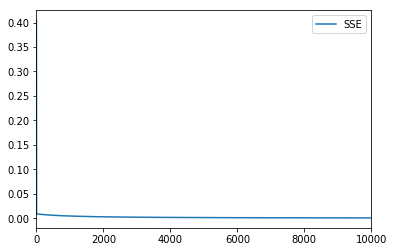

In [60]:
pd.DataFrame(errList,columns=['SSE']).plot()

In [58]:
errList

[0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.40477879557782137,
 0.4047787